Esaminiamo innanzitutto i record del dataset e vari dati nulli

--- CARICAMENTO DATASET ---
Totale righe caricate: 42497


/tmp/ipykernel_34500/1776409792.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_data.values, y=missing_data.index, palette="viridis")


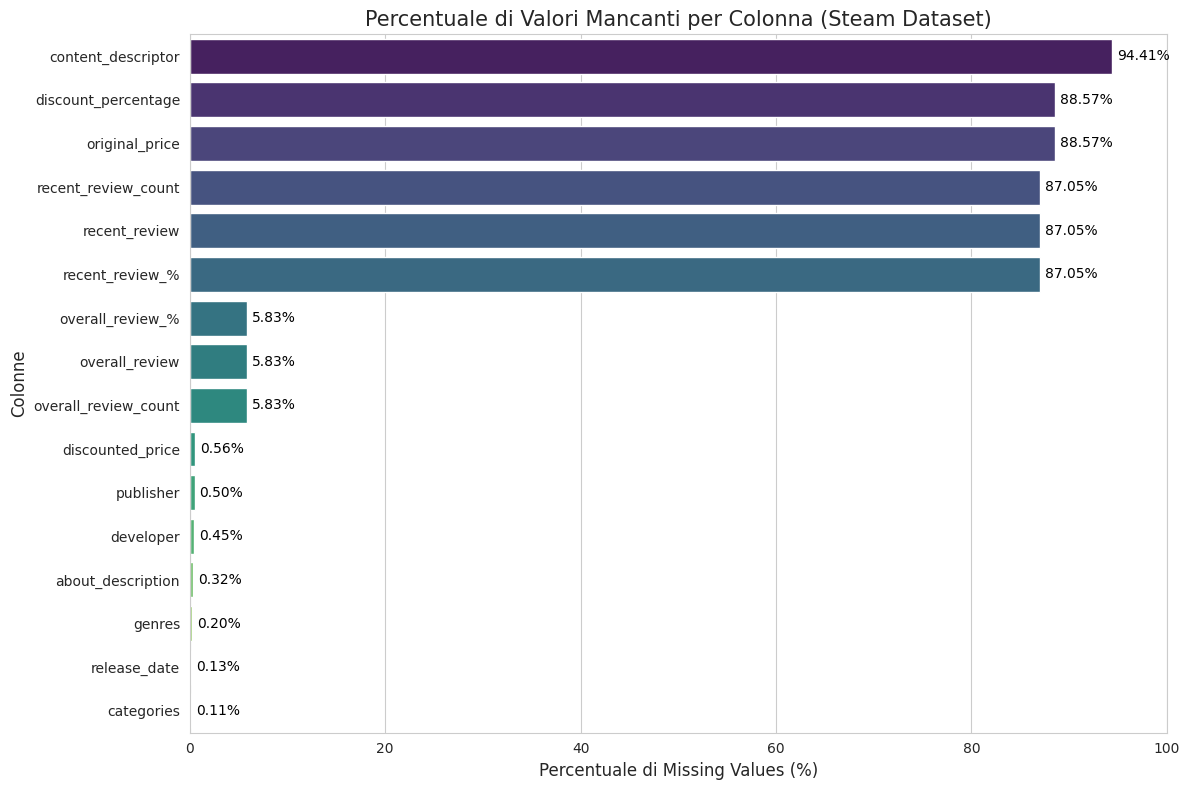

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CARICAMENTO DATI
print("--- CARICAMENTO DATASET ---")
file_path = os.path.join('datasets', 'steam-games.csv')

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Totale righe caricate: {len(df)}")
    
    # 2. CALCOLO VALORI MANCANTI
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100

    # Filtriamo solo le colonne che hanno effettivamente dei vuoti
    missing_data = missing_percent[missing_percent > 0].sort_values(ascending=False)

    if not missing_data.empty:
        # 3. CREAZIONE DEL GRAFICO
        plt.figure(figsize=(12, 8))
        sns.set_style("whitegrid")
        
        # Creiamo il barplot
        ax = sns.barplot(x=missing_data.values, y=missing_data.index, palette="viridis")
        
        # Aggiungiamo etichette e titoli
        plt.title('Percentuale di Valori Mancanti per Colonna (Steam Dataset)', fontsize=15)
        plt.xlabel('Percentuale di Missing Values (%)', fontsize=12)
        plt.ylabel('Colonne', fontsize=12)
        plt.xlim(0, 100) # Impostiamo il limite a 100% per dare prospettiva

        # Aggiungiamo il valore numerico accanto ad ogni barra
        for i, v in enumerate(missing_data.values):
            ax.text(v + 0.5, i, f'{v:.2f}%', color='black', va='center')

        plt.tight_layout()
        plt.show()
    else:
        print("\nOttimo! Non ci sono valori mancanti nel dataset.")

else:
    print(f"ERRORE CRITICO: Il file '{file_path}' non è stato trovato.")